In [1]:
#pip install opencv-python

In [2]:
import cv2
input = cv2.imread('input.jpg')
cv2.imshow("Hello World", input)
cv2.waitKey() # Klavyeden tuşa basılmasını bekliyor
cv2.destroyAllWindows() # Tüm pencereleri kapa

In [3]:
input # RGB değerleri

array([[[12, 18, 31],
        [12, 18, 31],
        [11, 17, 30],
        ...,
        [21, 24, 38],
        [21, 24, 38],
        [21, 24, 38]],

       [[12, 18, 31],
        [12, 18, 31],
        [12, 18, 31],
        ...,
        [21, 24, 38],
        [21, 24, 38],
        [21, 24, 38]],

       [[12, 18, 31],
        [12, 18, 31],
        [12, 18, 31],
        ...,
        [21, 24, 38],
        [21, 24, 38],
        [21, 24, 38]],

       ...,

       [[ 4,  7, 12],
        [ 4,  7, 12],
        [ 3,  7, 12],
        ...,
        [18, 23, 38],
        [19, 24, 39],
        [20, 25, 40]],

       [[ 3,  6, 11],
        [ 3,  6, 11],
        [ 3,  6, 11],
        ...,
        [18, 23, 38],
        [19, 24, 39],
        [20, 25, 40]],

       [[ 3,  6, 11],
        [ 3,  6, 11],
        [ 2,  5, 10],
        ...,
        [18, 23, 38],
        [18, 23, 38],
        [19, 24, 39]]], dtype=uint8)

In [4]:
input.shape # Tensor == çok boyutlu

(830, 1245, 3)

In [5]:
#!pip install scikit-image

from skimage import data # hazır resimler

In [6]:
bush = data.lfw_subset()
bush=bush[0,:,:]

In [7]:
import matplotlib.pyplot as plt;

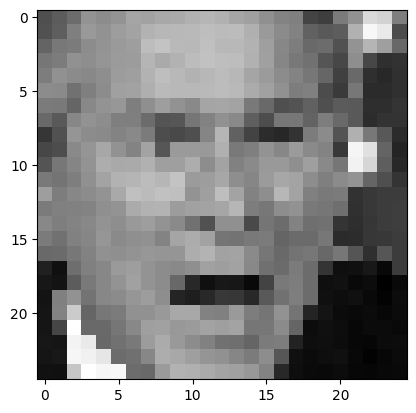

In [8]:
plt.imshow(bush,cmap='gray', interpolation='nearest');

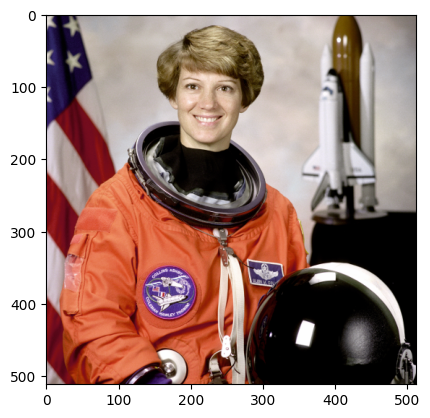

In [9]:
image=data.astronaut()
plt.imshow(image);

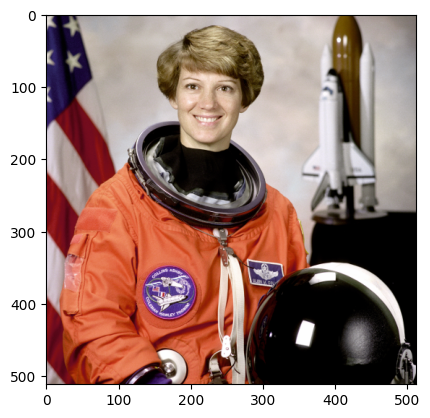

In [10]:
plt.imshow(image,cmap='gray')

In [11]:
import cv2
image = cv2.imread('input.jpg') # dosyayı tanıt
cv2.imshow('original', image) # original dosyayı göster
cv2.waitKey() # Klavyeden tuşa basılmasını bekliyor
gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # black white yaptık
cv2.imshow('Grayscale',gray_image) # göster
cv2.waitKey() # Klavyeden tuşa basılmasını bekliyor
cv2.destroyAllWindows() # Tüm pencereleri kapa

In [12]:
import cv2
image = cv2.imread('input.jpg',0)
cv2.imshow('BW', image)
cv2.waitKey() # Klavyeden tuşa basılmasını bekliyor
cv2.destroyAllWindows() # Tüm pencereleri kapa

In [13]:
import cv2
image = cv2.imread('input.jpg') # dosyayı tanıt
B,G,R = image[0,0]
print(B,G,R)

12 18 31


In [14]:
#image[0,0] = 180,220,180
#import cv2
#cv2.imshow('BW', image[0,0])
#cv2.waitKey() # Klavyeden tuşa basılmasını bekliyor
#cv2.destroyAllWindows() # Tüm pencereleri kapa

In [15]:
image.shape

(830, 1245, 3)

In [16]:
import cv2
image = cv2.imread('input.jpg')
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
cv2.imshow('Hue Channel', hsv_image[:,:,0]) # insan gözü RGB Bilgisayarın gördüğü
cv2.imshow('Saturation Channel', hsv_image[:,:,1]) # insan gözü
cv2.imshow('Value Channel', hsv_image[:,:,2]) # insan gözü
cv2.waitKey() # Klavyeden tuşa basılmasını bekliyor
cv2.destroyAllWindows() # Tüm pencereleri kapa

In [17]:
import cv2
image = cv2.imread('input.jpg')
B,G,R = cv2.split(image) # R G B ayırdık
cv2.imshow('Red',R) 
cv2.imshow('Green',G)
cv2.imshow('Blue',B)

merged = cv2.merge([B,G,R]) #birleştirme
cv2.imshow('Merged', merged)

merged=cv2.merge([B,G+100,R])
cv2.imshow('Merged', merged)
cv2.waitKey() # Klavyeden tuşa basılmasını bekliyor
cv2.destroyAllWindows() # Tüm pencereleri kapa

# Edge Detection

In [18]:
image = cv2.imread('input.jpg',0)

height,width = image.shape[:2]

sobel_x = cv2.Sobel(image,cv2.CV_64F,0,1,ksize = 5)
sobel_y = cv2.Sobel(image,cv2.CV_64F,1,0,ksize = 5)

cv2.imshow('Rotated Image',image)
cv2.waitKey(0)
cv2.imshow('Sobel X',sobel_x)
cv2.waitKey(0)
cv2.imshow('Sobel Y',sobel_y)
cv2.waitKey(0)

sobel_OR = cv2.bitwise_or(sobel_x,sobel_y)
cv2.imshow('sobel_OR',sobel_OR)
cv2.waitKey(0)

laplacian = cv2.Laplacian(image,cv2.CV_64F)
cv2.imshow('Laplacian',laplacian)
cv2.waitKey(0)

canny = cv2.Canny(image,50,120) # köşe bulucu
cv2.imshow('Canny',canny)
cv2.waitKey(0)


cv2.destroyAllWindows()

# Live Sketch

In [19]:
def sketch(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #COLOR_BGR2GRAY siyah beyaz yap

    img_gray_blur = cv2.GaussianBlur(img_gray,(5,5),0) # bulanıklaştır
    canny_edges = cv2.Canny(img_gray_blur,10,70) # Canny edge - sınır belirleme olayı
    ret,mask = cv2.threshold(canny_edges,250,255,cv2.THRESH_BINARY_INV) # derinlik ayrımı için eşik değeri
    return mask

cap = cv2.VideoCapture(0) # (0) Laptop Camera (1) başka kamera kullanma

while True:
    ret,frame = cap.read() # frame = şuanki görüntü, ret = diğer görüntü karesi
    cv2.imshow('Our live Sketcher',sketch(frame))
    if cv2.waitKey(1) == 13: # enter ile çıkış
        break
cap.release()
cv2.destroyAllWindows()
print('done')

done


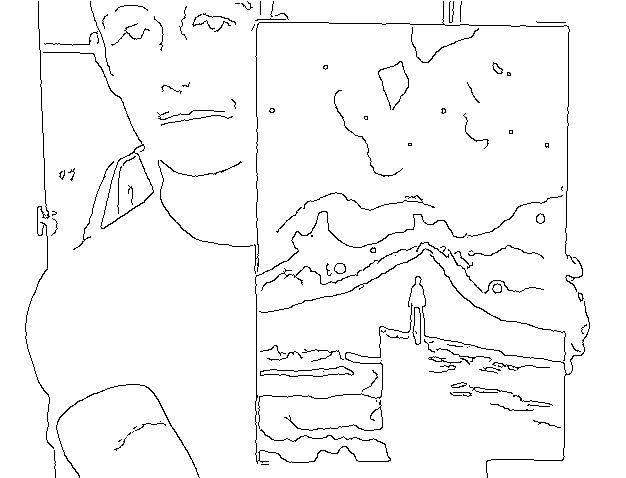

# TemplateMatching

In [20]:
import cv2
import numpy as np

image = cv2.imread("WaldoBeach.jpg") # okunan resim

cv2.imshow("Where is Waldo",image) # görüntü
cv2.waitKey(0)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # COLOR_BGR2GRAY siyah beyaz yap
template = cv2.imread("waldo.jpg",0) # aranan kişi waldo, siyah beyaz oku

result = cv2.matchTemplate(gray,template,cv2.TM_CCOEFF)
minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(result)

top_left = maxLoc
bottom_right =(top_left[0] + 50, top_left[1]+50) # kare çizme
cv2.rectangle(image,top_left,bottom_right,(0,0,255),4) # kırmızı kare ekle

cv2.imshow("Where is Waldo",image)
cv2.waitKey(0)
cv2.destroyAllWindows()
print('done')

done


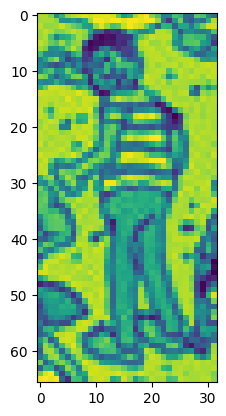

In [21]:
plt.imshow(template) # Aranan resim

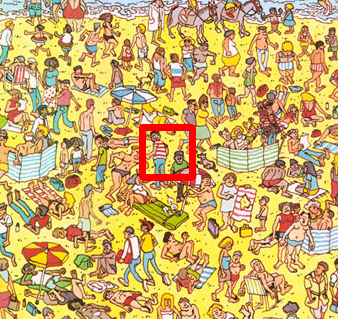

In [22]:
# Tek resim varsa?
# Data (Image) Augmentation - tek resimden 10 bin farklı resim üretilebilir.

In [23]:
#pip install imutils

# Flip Images and Data Augmantation

In [24]:
import imutils
import numpy as np

image = cv2.imread("input.jpg")
cv2.imshow("Original",image)
cv2.waitKey()
flipped = cv2.flip(image,0)
cv2.imshow("Vertical Flip",flipped)
cv2.waitKey()
flipped = cv2.flip(image,1)
cv2.imshow("Horizontal Flip",flipped)
cv2.waitKey()
flipped = cv2.flip(image,-1)
cv2.imshow("Bot Flip",flipped)
#cv2.imwrite(flipped)
cv2.waitKey()
cv2.destroyAllWindows()

# Video Görüntüsü alma

In [25]:
import cv2
cap = cv2.VideoCapture("airplanes.mp4") # 0 yazarsak kendimizi alır

while True:
    ret,frame= cap.read()
    if ret:
        cv2.imshow("Demo",frame)
    else:
        break
    key = cv2.waitKey(10)
    if key == ord("q"): # çıkmak için Q'ye bas
        break

cv2.destroyAllWindows()

In [26]:
import cv2
cap = cv2.VideoCapture(0)

while True:
    ret,frame= cap.read() # kamerayı oku
    if ret:
        cv2.imshow("Alper",frame)
    else:
        break
    key = cv2.waitKey(1)
    if key == ord("q"): 
        break

cv2.destroyAllWindows()

In [27]:
import cv2
cap = cv2.VideoCapture("cars.mp4") # 0 yazarsak kendimizi alır

while True:
    ret,frame= cap.read()
    if ret:
        cv2.imshow("Demo",frame)
    else:
        break
    key = cv2.waitKey(10)
    if key == ord("q"): # çıkmak için Q'ye bas
        break

cv2.destroyAllWindows()

In [28]:
cap = cv2.VideoCapture(0)

ret1,frame1 = cap.read()
ret2,frame2 = cap.read()

while True:
    frame1_gray = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    frame1_blur = cv2.GaussianBlur(frame1_gray,(21,21),0)
    frame2_blur = cv2.GaussianBlur(frame2_gray,(21,21),0)

    diff = cv2.absdiff(frame1_blur,frame2_blur)
    cv2.imshow("Motion",diff)
    frame1 = frame2
    ret,frame2 = cap.read()
    if not ret:
        cap.release()
        break
    key = cv2.waitKey(10)
    if key == ord("q"):
        cap.release()
        break
cv2.destroyAllWindows()

In [29]:
cap = cv2.VideoCapture("cars.mp4")

ret1,frame1 = cap.read()
ret2,frame2 = cap.read()

while True:
    frame1_gray = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    frame1_blur = cv2.GaussianBlur(frame1_gray,(21,21),0)
    frame2_blur = cv2.GaussianBlur(frame2_gray,(21,21),0)

    diff = cv2.absdiff(frame1_blur,frame2_blur)
    cv2.imshow("Motion",diff)
    frame1 = frame2
    ret,frame2 = cap.read()
    if not ret:
        cap.release()
        break
    key = cv2.waitKey(10)
    if key == ord("q"):
        cap.release()
        break
cv2.destroyAllWindows()

In [30]:
cap = cv2.VideoCapture("airplanes.mp4")

ret1,frame1 = cap.read()
ret2,frame2 = cap.read()

while True:
    frame1_gray = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    frame1_blur = cv2.GaussianBlur(frame1_gray,(21,21),0)
    frame2_blur = cv2.GaussianBlur(frame2_gray,(21,21),0)

    diff = cv2.absdiff(frame1_blur,frame2_blur)
    cv2.imshow("Motion",diff)
    frame1 = frame2
    ret,frame2 = cap.read()
    if not ret:
        cap.release()
        break
    key = cv2.waitKey(10)
    if key == ord("q"):
        cap.release()
        break
cv2.destroyAllWindows()

In [31]:
cap = cv2.VideoCapture("airplanes.mp4")

ret1,frame1 = cap.read()
ret2,frame2 = cap.read()

while True:
    frame1_gray = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    frame1_blur = cv2.GaussianBlur(frame1_gray,(21,21),0)
    frame2_blur = cv2.GaussianBlur(frame2_gray,(21,21),0)

    diff = cv2.absdiff(frame1_blur,frame2_blur)

    thresh = cv2.threshold(diff,20,255,cv2.THRESH_BINARY)[1]
    final = cv2.dilate(thresh,None,iterations=2)

    masked = cv2.bitwise_and(frame1,frame1,mask=thresh)
    white_pixels = np.sum(thresh) /255

    rows,cols = thresh.shape
    total= rows*cols
    if white_pixels > 0.01*total:
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame1,"Movement Detected - Hareket Var",(10,50),font,1,(0,0,255),2,cv2.LINE_AA)
    cv2.imshow("Motion",frame1)
    frame1=frame2
    ret,frame2 = cap.read()
    if not ret:
        break
    key = cv2.waitKey(10)
    if key == 27 or key == ord("q"):
        break
cv2.destroyAllWindows()

In [32]:
image = cv2.imread("bunchofshapes.jpg")
cv2.imshow("Input Image",image)
cv2.waitKey(0)

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(gray,30,200)
cv2.imshow("Canny Edges",edged)
cv2.waitKey(0)

contours,hierarchy = cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cv2.imshow("Canny Edges After Contouring",edged)
cv2.waitKey(0)

print("Number of Contours found = " + str(len(contours)))

cv2.drawContours(image,contours,-1,(0,255,0),thickness=2)

cv2.imshow("Contours",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of Contours found = 4


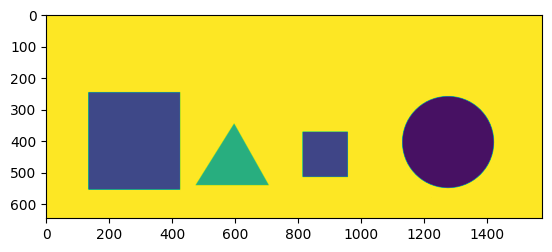

In [33]:
plt.imshow(cv2.imread("bunchofshapes.jpg",0))

# Sunflower count

In [34]:
# Read image
image = cv2.imread("Sunflowers.jpg")

# Set up the detector with default par ameters.
detector =cv2.SimpleBlobDetector_create()

# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of
# the circle corresponds to the size of blob
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (255,0,0),
                                      cv2.DRAW_MATCHES_FLAGS_DEFAULT)

# Show keypoints
cv2.imshow("Blobs", blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:

# classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load our image then convert it to grayscale
image = cv2.imread('myself.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2.imshow('Face Detection', image)
    cv2.waitKey(0)

cv2.destroyAllWindows()


<>:13: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
C:\Users\alperugurcan\AppData\Local\Temp\ipykernel_7552\484948615.py:13: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
  if faces is ():


# Canlı yüz tanıma kodu

In [36]:
import cv2
import numpy as np
from time import sleep
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')
def face_detector(img, size=0.5):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return img
    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        sleep(.05)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
    img = cv2.flip(img,1)
    return img
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    cv2.imshow('Our Face Extractor', face_detector(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
cap.release()
cv2.destroyAllWindows()

<>:10: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
C:\Users\alperugurcan\AppData\Local\Temp\ipykernel_7552\2352412060.py:10: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
  if faces is ():


# Face photo collect 100

In [1]:
#pip install opencv-contrib-python --user

  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl (45.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [40]:
face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
def face_extractor(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)
    if faces is ():
        return None
    for (x,y,w,h) in faces:
        cropped_face = img[y:y+h,x:x+w]
    return cropped_face
cap = cv2.VideoCapture(0)
count = 0
while True:
    ret,frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame),(200,200))
        face = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
        file_name_path = './faces/user/' + str(count) +'.jpg'
        cv2.imwrite(file_name_path,face)
        cv2.putText(face,str(count),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
        cv2.imshow("Face Cropper",face)
    else:
        print("Face not found")
        pass
    if cv2.waitKey(1) == 13 or count ==100:
        break
cap.release()
cv2.destroyAllWindows()
print('Collecting Samples Complete')

<>:5: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
C:\Users\alperugurcan\AppData\Local\Temp\ipykernel_7552\4221010147.py:5: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
  if faces is ():


Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found


In [1]:
#Eğitim
import cv2
import numpy as np
from os import listdir
from os.path import isfile,join

data_path = './faces/user/'
onlyfiles =[f for f in listdir(data_path) if isfile(join(data_path,f))]

Training_Data,Labels = [],[]

for i,files in enumerate(onlyfiles):
    image_path = data_path + onlyfiles[i]
    images = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    Training_Data.append(np.asarray(images,dtype = np.uint8))
    Labels.append(i)

Labels = np.asarray(Labels,dtype = np.int32)
model = cv2.face.LBPHFaceRecognizer_create()

model.train(np.asarray(Training_Data),np.asarray(Labels))
print("Model Trained Succesfully")


Model Trained Succesfully


In [3]:
# Kamerada modeli kullanma
face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
def face_extractor(img, size = 0.5):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)
    if faces is ():
        return img,[]
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        roi = img[y:y+h, x:x+w]
        roi = cv2.resize(roi,(200,200))
    return img,roi
cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read()
    image,face = face_extractor(frame)
    try:
        face = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
        results = model.predict(face)
        if results[1]<500:
            confidence = int(100 * (1-(results[1])/400))
            display_string = str(confidence) + '% sure this guy is Alper'
        cv2.putText(image,display_string,(100,120),cv2.FONT_HERSHEY_COMPLEX,1,(255,120,150),2)
        if confidence > 75:
            cv2.putText(image,"Unlocked" ,(250,450),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
            cv2.imshow("Face Recognition",image)
        else:
            cv2.putText(image,"Locked" ,(250,450),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
            cv2.imshow("Face Recognition",image)
    except:
        cv2.putText(image,"No Face Found" ,(220,120),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
        cv2.putText(image,"Locked" ,(250,450),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
        cv2.imshow("Face Recognition",image)
    if cv2.waitKey(1) == 13:
        cap.release()
        break
cap.release()
cv2.destroyAllWindows()

<>:5: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
C:\Users\alperugurcan\AppData\Local\Temp\ipykernel_7812\4082506018.py:5: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
  if faces is ():


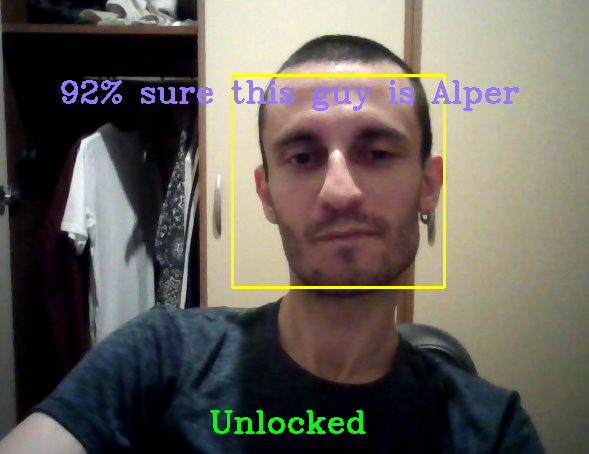